In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## read and describe the metadata

In [291]:
fpn_csv = '/Users/juandherrera/Google Drive/017_Machine Learning/machinelearning/Assignment_3-final/cluster_images-juan.csv'
data = pd.read_csv(fpn_csv, encoding='ISO-8859-1')

In [292]:
# get column names
# list(data)

In [293]:
# data.head()

## create a subset of the columns you will use to fit KMeans

Here, I am **arbitrarily** choosing the seven [visual variables defined by Bertin](http://www.infovis-wiki.net/index.php?title=Visual_Variables#Jaques_Bertin). Variable descriptions [here](https://github.com/visualizedata/ml/blob/master/ML_assignment_3/contents-of-cluster_images.csv). 

You should choose the columns that you decide will best define the clusters. You may need to make transformations on existing variables. 

In [312]:
X = data[['pmedium_id', 'pl', 'si', 'va','va_sqr', 'co', 'co_sqr', 'or', 'or_sqr', 'te', 'sh', 'po', 'li']]

In [313]:
# X.head()

# KMeans

In [314]:
from sklearn.cluster import KMeans

## plot inertia scores by number of clusters

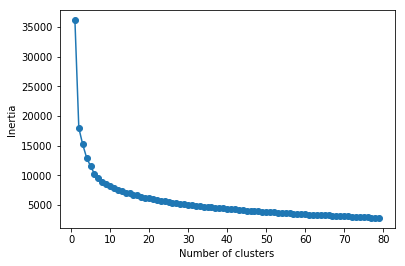

In [315]:
# first attempt at fitting K means to view change in Inertia

# container to store inertia scores over iterations
distortions = []

# fit KMeans iteratively to begin to assess the appropriate number of clusters
for i in range(1, 80):
    km = KMeans(n_clusters=i, verbose=0, random_state=42, n_init= 20, n_jobs=2)
    km.fit(X)
    distortions.append(km.inertia_)
    
# vizualize change in inertia
plt.plot(range(1, 80), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## create silhouette plots to assess various specifications for `n_clusters` in `KMeans`

In [316]:
# modify this list to include the numbers of clusters you want to see
# I have *arbitrarily* chosen these values
range_n_clusters = [5, 10, 15, 20, 25]

For n_clusters = 5 The average silhouette_score is : 0.22858740645186043


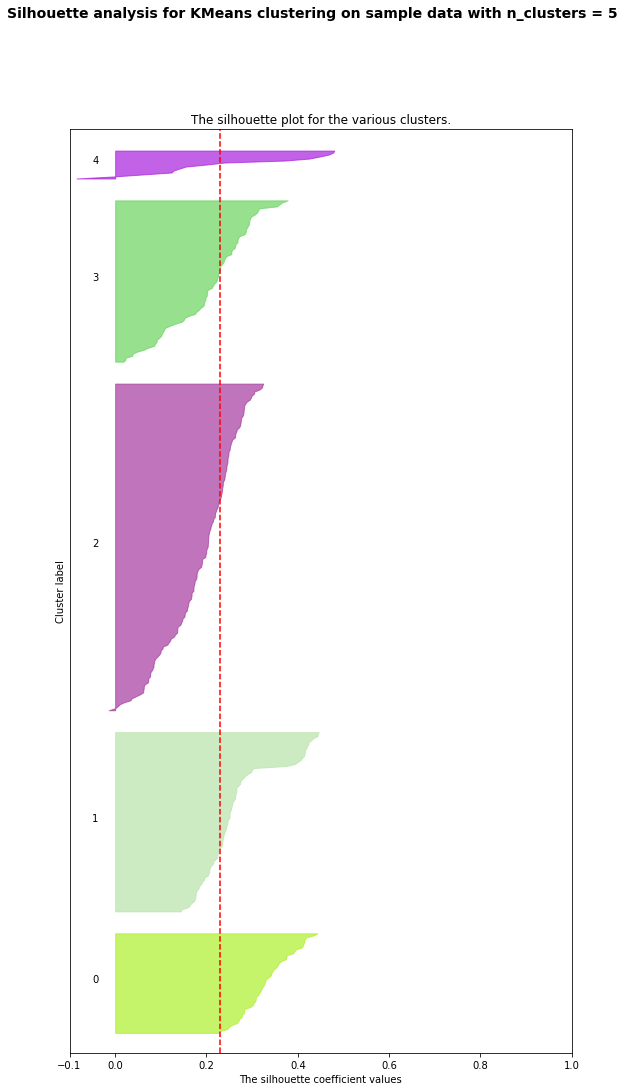

For n_clusters = 10 The average silhouette_score is : 0.2217395970045441


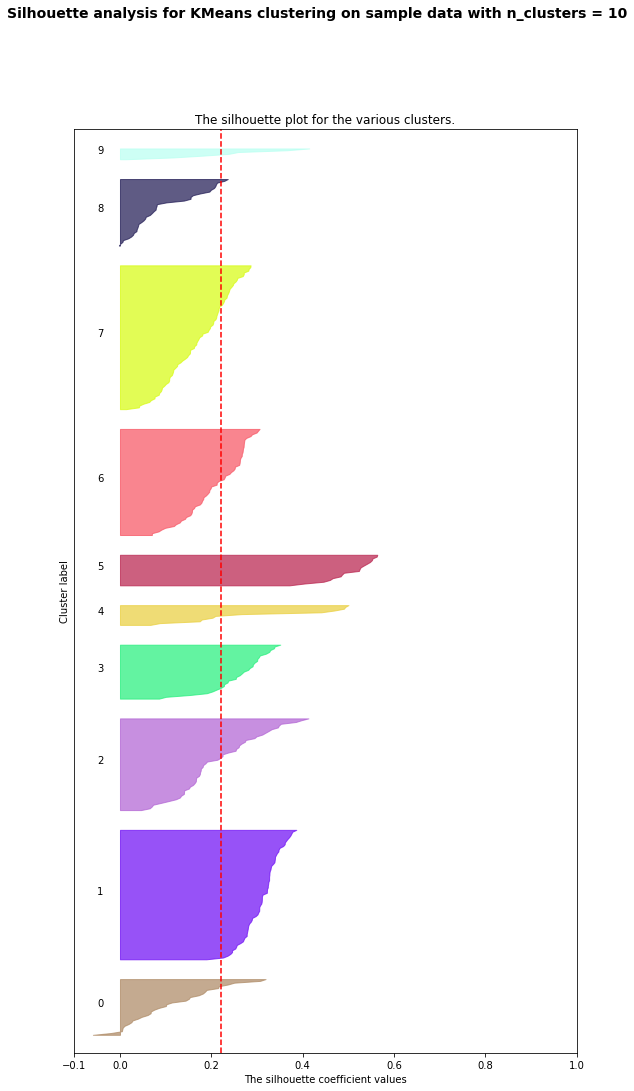

For n_clusters = 15 The average silhouette_score is : 0.17999820660481522


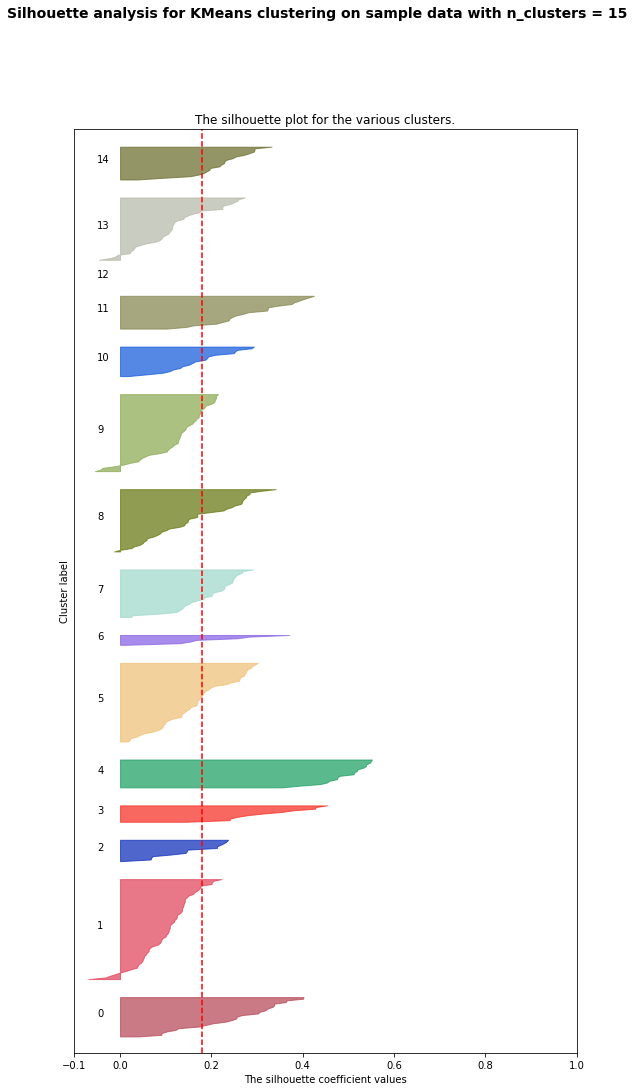

For n_clusters = 20 The average silhouette_score is : 0.16996352212217944


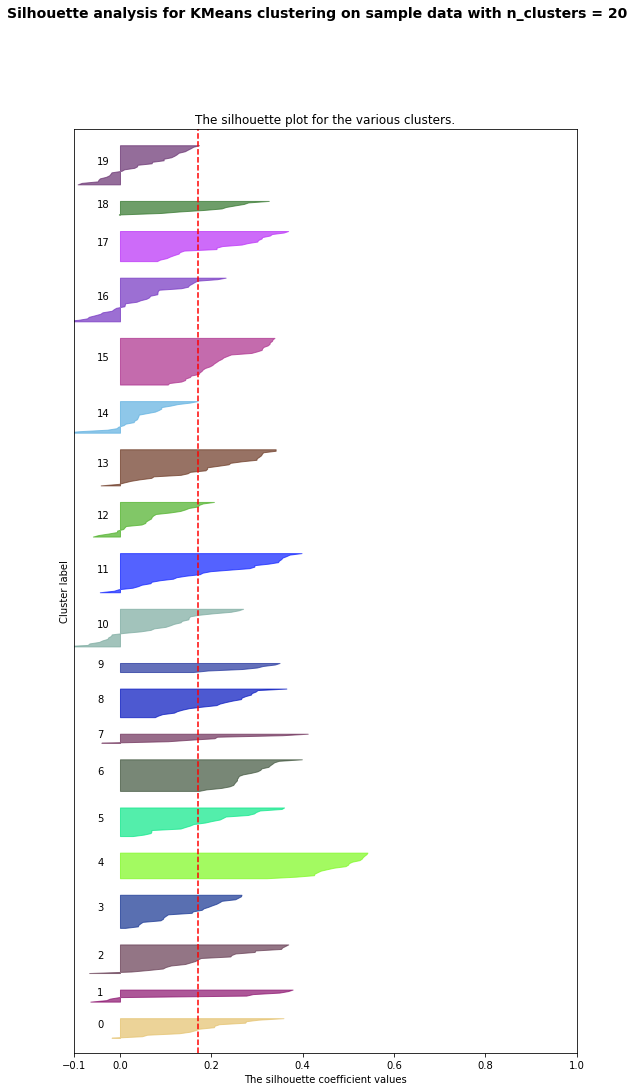

For n_clusters = 25 The average silhouette_score is : 0.17558185035782012


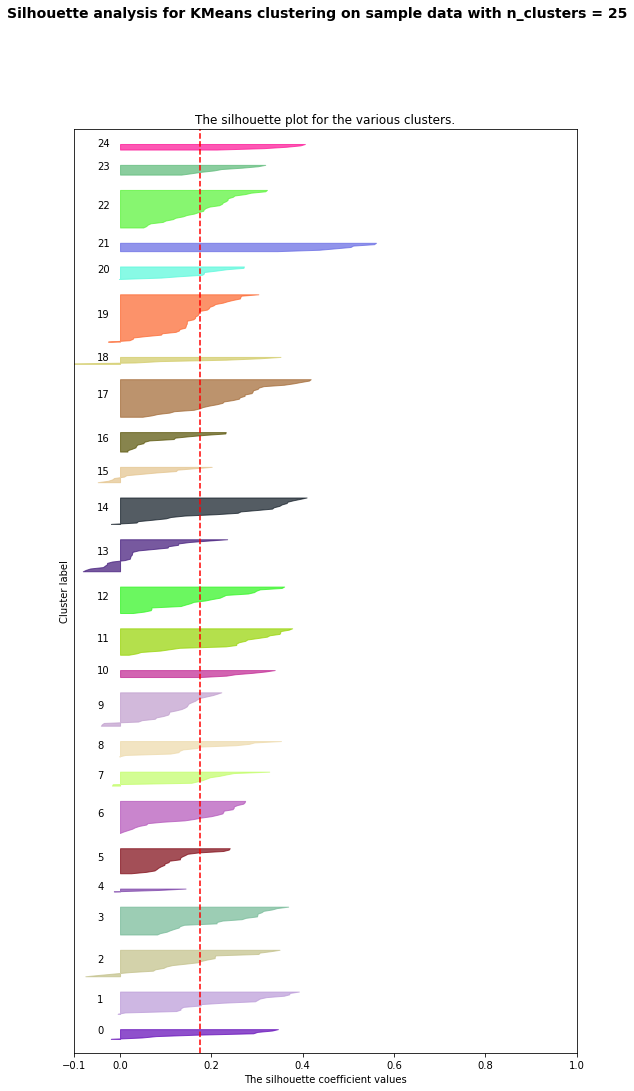

In [317]:
# modified from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import random

for n_clusters in range_n_clusters:
    # Create a subplot
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 17)

    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init= 20, n_jobs=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## final fit

After you have decided which features to include and the number of clusters you want, fit your final KMeans model. I have **arbitrarily** chosen 5. 

In [326]:
# set the number of clusters in the final model
my_n_clusters = 12

In [327]:
km = KMeans(n_clusters=my_n_clusters, random_state=42, n_init= 20, n_jobs=2)
results = km.fit(X)
data['labels']=km.labels_
# print (data.head())
data.to_csv('results.csv')

## look at results

The key to knowing if you have chosen the right features and clusters: looking at the images in each cluster and deciding whether they seem to belong together. You could extend this starter code to display the images in this notebook, or you may decide to use Python to write an html file/files to view the images by cluster.

In [285]:
# from IPython.display import Image
# filepath='/Users/juandherrera/Google Drive/017_Machine Learning/machinelearning/Assignment_3-final/img_small/'
# for i in range(0, max(km.labels_)+1):
#     print(" ")
#     print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
#     print("Images in cluster: " + str(i))
#     print("* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * ")
#     for j in range(0, len(km.labels_)):
#         if km.labels_[j] == i:
#             display(Image(filename=filepath+(str(j+2) + '_small.jpg'), format='jpg', embed=True))